# Bernoulli Practice

### Introduction

Over the last couple of lessons, we familiarized ourselves with the bernoulli random variable. The bernoulli random variable allows us to model events where there are only two potential outcomes.  In this lab, we'll use our knowledge of the bernoulli to model events and sequences of events.

### Modelling Likes

Let's say that we are an aspiring Youtube influencer.  We have just posted a particularly catchy video, and know that the probability of a user liking the video is $.3$.

Remember that the PDF of a bernoulli can be written as the following:

$P(X = x) = p^x(1 - p)^{1 - x}$

Use the formula above to write a function called `prob_of_like`, that takes in either a 1 or a 0, to represent the occurrence or non-occurrence of a like,  and returns the related probability.

In [1]:
def prob_of_like(x):
    return (.7**x)*(1 - .7)**(1 - x)

In [2]:
prob_of_like(0)

0.30000000000000004

### Sequence of Events

Next let's model the probability of a *sequence* of events.  Remember, that if each event in a sequence is both independent (meaning the occurrence of one event does not effect the occurrence of another event), and that each event is identically distributed (meaning each event has the same likelihood of occurring), then probability of the sequence occurring is defined as:

$P(X) = \prod_{i=1}^n  p^x(1 - p)^{1 - x}$

Write a function called, `prob_of_like_sequence` that takes in a list of events and returns the probability of the sequence occurring.

> Hint: You can use the `np.prod` function to return the product of elements in an array.

In [6]:
import numpy as np
np.prod([2, 1, 3])

6

In [31]:
import numpy as np
def prob_of_like_sequence(events):
    return np.prod(np.array([prob_of_like(event) for event in events]))

In [8]:
sequence_1 = [1, 1, 0, 1, 0, 1]

sequence_2 = [1, 1, 0, 1, 1, 1]

In [10]:
prob_of_like_sequence(sequence_1)
# 0.021609

0.021609

In [11]:
prob_of_like_sequence(sequence_2)
# 0.05042099999999999

0.05042099999999999

### Different Combinations of Sequences

Above, we calculated the probability of a particular sequence of events occurring.  Now let's calculate the probabilities of different numbers of likes occurring, but where we do not care about the order of likes.

Remember that the probability in any order is the probability of a particular sequence, multiplied by the combination of sequences:

$P(X) = $ $ n \choose k$  $\prod_{i=1}^n  p^x(1 - p)^{1 - x}$

1. Let's start with finding the probability that five of six of viewers liked a video, regardless of order.  

> And again, the probability of a user liking a video is $.7$. 

Let's break this into steps.  First, use our previous function to find the probability of a sequence of five of six likes.

In [25]:
sequence_2 = [1, 1, 1, 1, 1, 0]
prob_of_five_likes = prob_of_like_sequence(sequence_2)
prob_of_five_likes

0.05042099999999999

> So use that with the combination function to find the probability of this occurring in any combination.

In [26]:
from scipy.special import comb
num_combinations = comb(6, 5)
num_combinations
# 6.0

6.0

Now multiply these numbers together to find the probability in any sequence.

In [29]:
prob_of_five_any_order = prob_of_five_likes*num_combinations
prob_of_five_any_order
# 0.3025259999999999

0.3025259999999999

Let's do one more example.  

2. Find the probability of three of six likes, in any order.  

> Try to solve this without looking at the previous work.

In [36]:
three_of_six = [1, 1, 1, 0, 0, 0]
prob_of_seq = prob_of_like_sequence(three_of_six)

prob_of_three_of_six = comb(6, 3)*prob_of_seq
prob_of_three_of_six
# 0.18522000000000005

0.18522000000000005

### Plotting different probabilities

Finally, let's use our approach above, to calculate the probability of a each number of likes occurring, in any order, ranging from zero to six.

We'll provide the a list of sequences, with zero to six likes.

In [46]:
collection_of_events = [
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0],
    [1, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1]
]

In [49]:
comb(6, sum(collection_of_events[0]))

1.0

In [44]:
probs_of_each_number = [comb(6, sum(events))*prob_of_like_sequence(events)
                        for events in collection_of_events]

In [51]:
probs_of_each_number
# [0.0007290000000000006,
#  0.010206000000000007,
#  0.05953500000000003,
#  0.18522000000000005,
#  0.324135,
#  0.3025259999999999,
#  0.11764899999999995]

[0.0007290000000000006,
 0.010206000000000007,
 0.05953500000000003,
 0.18522000000000005,
 0.324135,
 0.3025259999999999,
 0.11764899999999995]

We can plot the various probabilities like so:

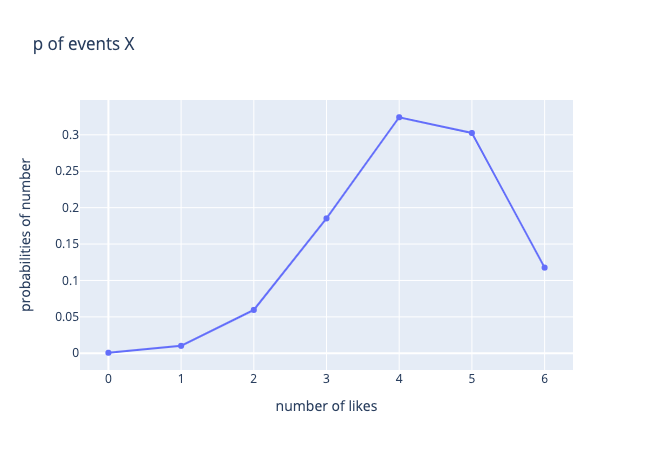

In [54]:
import plotly.graph_objects as go
num_of_likes = list(range(0, 7))
scatter = go.Scatter(x = num_of_likes, y = probs_of_each_number)
go.Figure(scatter, {'title': 'p of events X', 
                    'xaxis': {'title': 'number of likes'}, 
                    'yaxis': {'title': 'probabilities of number'}})

So we can see that the number of likes peaks at 4.  Note that this is what we would expect, simply by multiplying $.7*6$.

In [55]:
.7*6

4.199999999999999

### The binomial with Scipy

What we just created above, is a plot of the binomial distribution.  We did so by finding the probability of each number of likes, where there are six trials, and the probability of a like on each trial is .7.

We can use scipy to calculate the same thing.

In [78]:
from scipy.stats import binom
n_trials, p = 6, .7
rv = binom(n_trials, p)

And then we can plot the probability of each number of successes.

In [82]:
x = np.arange(0, 7, 1)
bin_probs = rv.pmf(x)
x,bin_probs

(array([0, 1, 2, 3, 4, 5, 6]),
 array([0.000729, 0.010206, 0.059535, 0.18522 , 0.324135, 0.302526,
        0.117649]))

Notice that we see the same pattern as above.

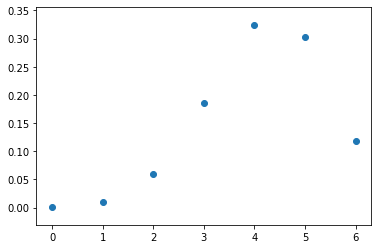

In [84]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

ax.scatter(x, bin_probs,
         label='frozen pmf')

### Summary

In this lesson, we practiced using the bernoulli random variable to model both an individual like, and a specific sequence of like.  We used the product rule, combined with the probability distribution function of the bernoulli to find the probability of a sequence of likes.  And we found plotted this probability for various sequences.